In [1]:


import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)


In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-1.472276,-1.819674,-1.099777,1.988421,4.327551,0
1,-1.442501,1.752941,1.116838,0.421216,1.505431,1
2,-0.181649,-0.541035,1.242057,0.468112,0.078887,0
3,-0.820756,-1.410052,0.833311,1.359125,0.455344,0
4,-1.398455,0.777726,0.980409,1.539633,0.523019,1


In [4]:
# function for row sampling

def sample_row(df,percent):
    return df.sample(int(percent*df.shape[0]),replace=True)

In [12]:
# function for feature sampling
def sample_features(df,percent):
    cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df

In [15]:
# FUNCTION  for combined sampling
import random
def combined_sampling(df,row_percent,col_percent):
    new_df = sample_row(df,row_percent)
    return sample_features(new_df,col_percent)
    

In [16]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\Pratyush\AppData\Local\Temp\ipykernel_7128\3999859604.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [17]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\Pratyush\AppData\Local\Temp\ipykernel_7128\3999859604.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [18]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\Pratyush\AppData\Local\Temp\ipykernel_7128\3999859604.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [19]:


print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col3', 'col1', 'target'], dtype='object')
Index(['col4', 'col5', 'target'], dtype='object')
Index(['col2', 'col3', 'target'], dtype='object')


In [20]:
df3

,col2,col3,target
42,2.671692,1.387259,1
55,-0.817986,1.090679,0
52,0.706533,-0.842541,0
67,-2.135885,0.312568,0
57,-0.347483,0.084515,0
14,0.639737,-0.130017,1
9,1.677155,0.117169,1
24,0.527874,0.838858,1
45,-0.930889,3.424745,1
57,-0.347483,0.084515,0


In [21]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [22]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [23]:
from sklearn.tree import plot_tree

[Text(0.8, 0.95, 'x[1] <= 0.377\ngini = 0.493\nsamples = 50\nvalue = [22.0, 28.0]'),
 Text(0.7333333333333333, 0.85, 'x[1] <= -0.307\ngini = 0.5\nsamples = 45\nvalue = [22, 23]'),
 Text(0.7666666666666666, 0.8999999999999999, 'True  '),
 Text(0.6666666666666666, 0.75, 'x[0] <= 2.026\ngini = 0.489\nsamples = 40\nvalue = [17, 23]'),
 Text(0.4666666666666667, 0.65, 'x[0] <= 0.94\ngini = 0.457\nsamples = 34\nvalue = [12, 22]'),
 Text(0.26666666666666666, 0.55, 'x[0] <= 0.832\ngini = 0.492\nsamples = 16\nvalue = [9, 7]'),
 Text(0.2, 0.45, 'x[0] <= -0.661\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.13333333333333333, 0.35, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.26666666666666666, 0.35, 'x[1] <= -1.77\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.13333333333333333, 0.25, 'x[0] <= -0.066\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.06666666666666667, 0.15, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2, 0.15, 'gini = 0.0\nsamples = 3\nvalue = [3

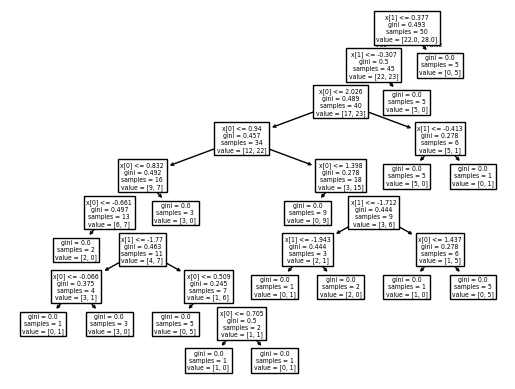

In [25]:
plot_tree(clf1)

[Text(0.53125, 0.9444444444444444, 'x[0] <= 2.213\ngini = 0.493\nsamples = 50\nvalue = [28.0, 22.0]'),
 Text(0.46875, 0.8333333333333334, 'x[1] <= 0.857\ngini = 0.476\nsamples = 46\nvalue = [28, 18]'),
 Text(0.5, 0.8888888888888888, 'True  '),
 Text(0.1875, 0.7222222222222222, 'x[0] <= 1.489\ngini = 0.32\nsamples = 20\nvalue = [16, 4]'),
 Text(0.125, 0.6111111111111112, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.25, 0.6111111111111112, 'x[1] <= -0.658\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.1875, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3125, 0.5, 'x[1] <= 0.685\ngini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.25, 0.3888888888888889, 'x[1] <= 0.657\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.1875, 0.2777777777777778, 'x[1] <= -0.275\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.125, 0.16666666666666666, 'x[0] <= 1.973\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.0625, 0.05555555555555555, 'gini = 0.0\nsamples = 1\nva

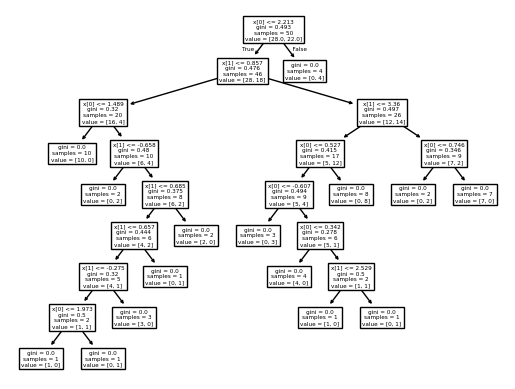

In [26]:
plot_tree(clf2)


[Text(0.6538461538461539, 0.9285714285714286, 'x[0] <= 0.122\ngini = 0.499\nsamples = 50\nvalue = [26, 24]'),
 Text(0.46153846153846156, 0.7857142857142857, 'x[1] <= 3.089\ngini = 0.252\nsamples = 27\nvalue = [23, 4]'),
 Text(0.5576923076923077, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.6428571428571429, 'x[0] <= -0.627\ngini = 0.204\nsamples = 26\nvalue = [23, 3]'),
 Text(0.23076923076923078, 0.5, 'x[0] <= -1.407\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(0.15384615384615385, 0.35714285714285715, 'x[0] <= -1.421\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.07692307692307693, 0.21428571428571427, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.23076923076923078, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.5384615384615384, 0.5, 'x[0] <= -0.474\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.46153846153846156, 0.3571428

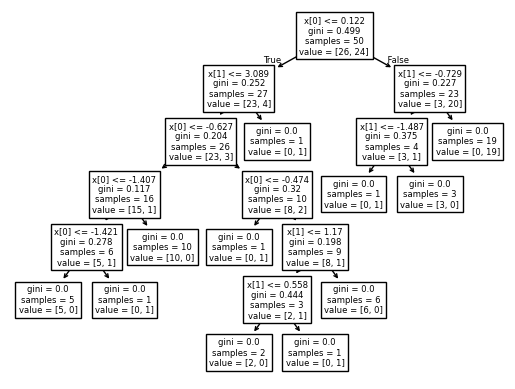

In [27]:
plot_tree(clf3)


In [28]:
clf1.predict(np.array([1.298796	,0.592649]).reshape(1,2))


C:\Users\Pratyush\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [29]:
clf2.predict(np.array([1.298796	,0.592649]).reshape(1,2))


C:\Users\Pratyush\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [30]:
clf3.predict(np.array([1.298796	,0.592649]).reshape(1,2))


C:\Users\Pratyush\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [31]:
df.sample(14,replace=True)


,col1,col2,col3,col4,col5,target
36,-1.044399,-1.492644,0.831045,1.486094,0.368690,0
23,1.383953,0.528509,-0.616442,-2.880107,3.058589,1
63,-0.428354,2.990448,1.062795,0.463490,3.530244,1
55,-1.930043,-0.817986,1.090679,0.906409,0.975477,0
64,1.168064,0.505598,3.288148,-0.722612,3.099445,1
90,-0.651488,-1.847552,1.202347,1.871266,0.272581,0
40,-1.732875,-1.765360,1.250901,1.708542,0.700842,0
11,-0.128162,1.011819,1.734244,-1.055689,2.724333,1
23,1.383953,0.528509,-0.616442,-2.880107,3.058589,1
91,-2.126070,1.491105,-0.222626,1.666859,0.668691,1
